# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#Cleaning">Data Cleaning</a></li>    
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#conclusions">Limitations</a></li>   
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb),
including user ratings and revenue.<br> 

● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|)
characters.<br> 
● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can
leave them as is.<br> 
● The final two columns ending with “_adj” show the budget and revenue of the associated movie
in terms of 2010 dollars,accounting for inflation over time.<br> 

## Analysis questions?
1. Does a higher budget influence higher popularity?

2. Does the length of the movie affect its popularity?

3. Does higher popularity mean higher profits?

4. What's the trend of movie production over the years?

In [2]:
# import statements for all of the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# Load your data and print out a few lines.
df = pd.read_csv(r'C:\Users\BKULA.SAFARICOM\Desktop\DS-DE\ALX-UDACITY\INVESTIGATE A DATASET PROJECT\tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Checking for the dimensions of the dataframe
df.shape

(10866, 21)

The dataset has 10866 rows and 21 columns.

In [5]:
#Checking for a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Some columns have missing data and wrong datatypes

In [6]:
#Checking for null values in each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

imdb_id, cast, homepage, director, tagline keywords, overview, genres and production_companies<br> have missing values hence have to be dealt with before proceeding with the analysis.

<a id='Cleaning'></a>
### Data Cleaning

In [7]:
# Dropping irrelevant columns and those with high missing values
df.drop(['id','imdb_id', 'homepage', 'overview', 'tagline', 'keywords'], axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


I dropped id,imdb_id, homepage, overview, tagline and keywords columns as I did not see their analysis benefit and some had many missing values.

In [8]:
#Rechecking for missing values
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

A few columns still have missing values and I feel the best way to deal with them is by dropping the rows<br> with missing values since imputation might distort the data. 

In [9]:
# Dropping rows with missing values
df.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=True)

I decided to drop all rows with missing values

In [10]:
#Rechecking to confirm no rows with missing values
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

I have zero missing values

In [11]:
# check for duplicates in the data
sum(df.duplicated())

1

I observe that I have one duplicated record and I plan to drop it.

In [12]:
# Dropping the duplicates 
df.drop_duplicates(inplace = True) 

I dropped the one duplicate record.

In [13]:
# Checking for duplicates for comfirmation
sum(df.duplicated())

0

I observe that I no longer have duplicate records in our data.

In [14]:
#Rechecking the shape of our now clean data 
df.shape

(9772, 15)

Our clean and analysable data has 9772 rows and 15 colums which is still sufficient for the analysis.

In [15]:
# Checking for data types
df.dtypes

popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

I observe that the release_datecolumn data type is not in the correct formart and resolve to change it to datetime formart.

In [16]:
# Convert release_date column datatype to date
df['release_date']= pd.to_datetime(df['release_date'])
df['release_date'].head(2)

0   2015-06-09
1   2015-05-13
Name: release_date, dtype: datetime64[ns]

In [17]:
# Rechecking for data types to confirm release_date column has changed
df.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

I observe that the release_date column is now in the datetime formart and can be used for analysis.

In [18]:
#Check for unique values in each column
df.nunique()

popularity              9735
budget                   533
revenue                 4611
original_title          9512
cast                    9723
director                4505
runtime                  224
genres                  1916
production_companies    7406
release_date            5602
vote_count              1289
vote_average              68
release_year              56
budget_adj              2549
revenue_adj             4742
dtype: int64

I observe that most columns have a high number of unique values

In [19]:
# Checking the statistical summary of the dataset
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03
mean,0.694721,1.617967e+07,4.423121e+07,102.926627,239.312014,5.963528,2000.878428,1.941599e+07,5.705309e+07
std,1.036931,3.221074e+07,1.225889e+08,27.877432,603.011504,0.913174,13.036794,3.566634e+07,1.514499e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.232710,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,3.061342e+05,0.000000e+00
75%,0.776408,1.928750e+07,3.104729e+07,112.000000,173.000000,6.600000,2011.000000,2.464268e+07,4.311848e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


I observe that from the statistical summary there might be outliers in some columns in our dataset as the max popularity is 32.99 while the mean for popularity is 0.69 however we will not deal with the outliers for this analysis.

<a id='eda'></a>
## Exploratory Data Analysis

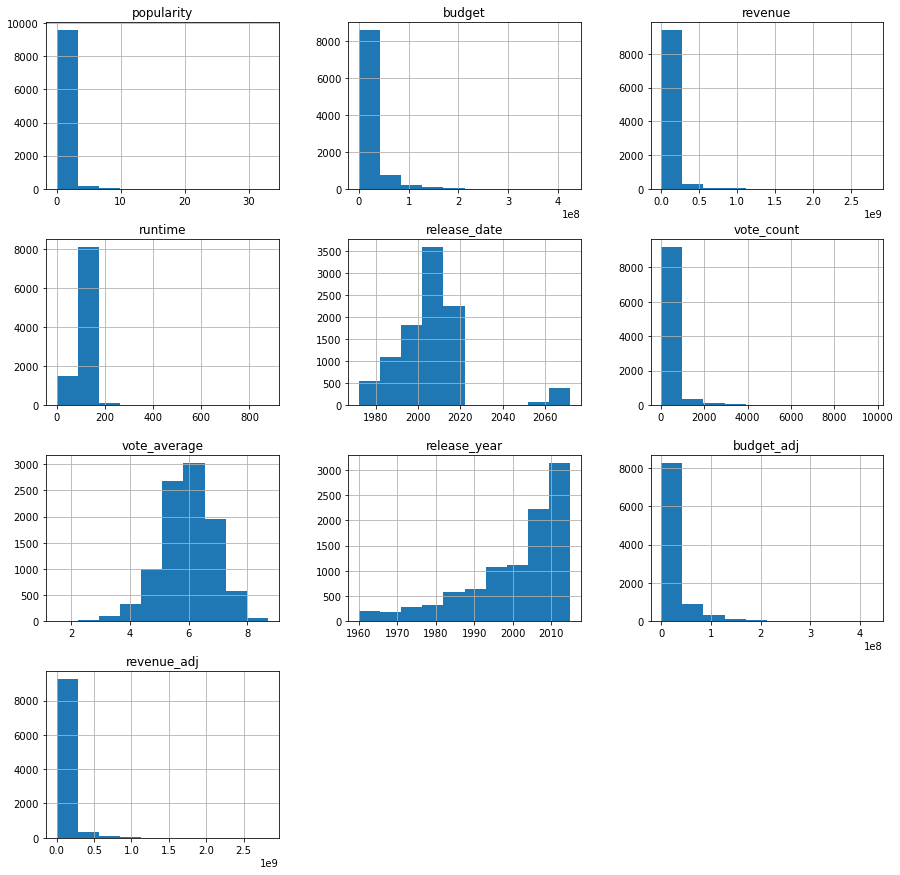

In [29]:
# explore data
df.hist(figsize=(15,15));

I observe from the above charts that most of our data is skewed to the right or skewed to the left hence no normal distribution. 

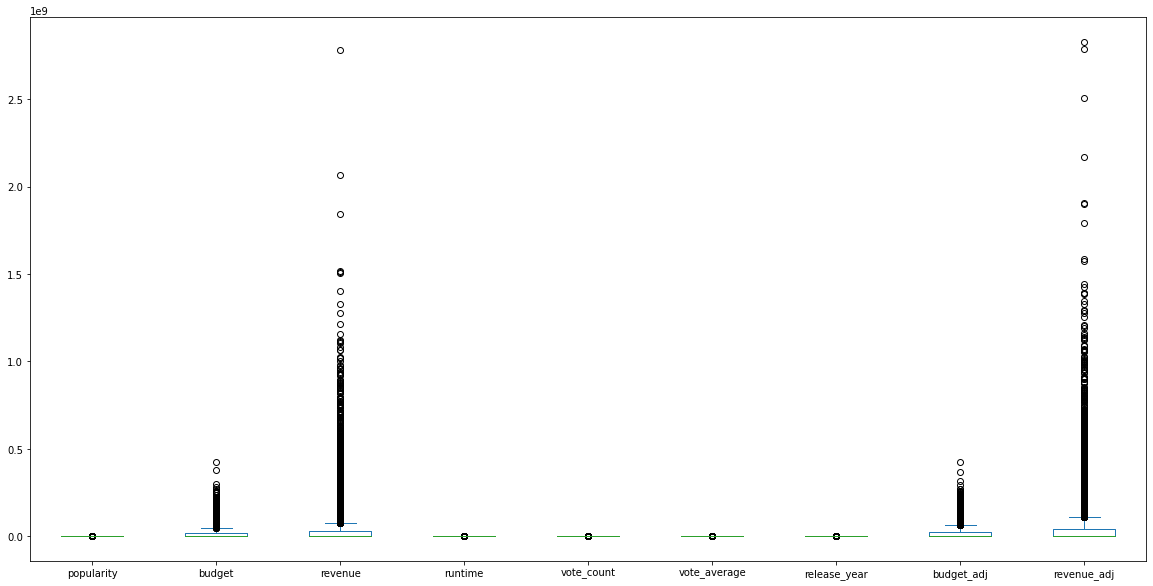

In [21]:
# explore data
df.plot(kind = 'box', figsize=(20,10));

From the above visualization we observe that most columns contain outliers.

### Research Question 1 (Does a higher budget influence higher popularity?)

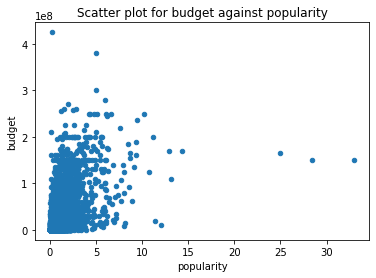

In [59]:
# Scatterplot to determine the relation between budget and popularity
def my_func(x,y):
    df.plot(x, y, kind="scatter")
    plt.title("Scatter plot for " + y + " against popularity")
    plt.xlabel(x)
    plt.ylabel(y)
my_func('popularity','budget')

From the observation of the above scatter plot I can confidently say that a higher budget does not necessarily guarantee a higher popularity of the movie.

### Research Question 2  (Does the length of the movie affect its popularity?)

In [25]:
df['runtime'].describe()

count    9772.000000
mean      102.926627
std        27.877432
min         0.000000
25%        90.000000
50%       100.000000
75%       112.000000
max       877.000000
Name: runtime, dtype: float64

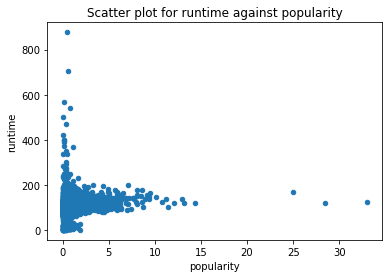

In [64]:
# # Scatterplot to determine the relation between runtime and popularity
my_func('popularity','runtime')

From observation of the above visualization Movies with average length are the most popular with movies with longer length and shorter length having low popularity. Movie producers should take note of this and ensure they produce movies with runtime of between 100-150 so as to achieve maximum popularity.

### Research Question 3  (Does higher popularity mean higher profits?)

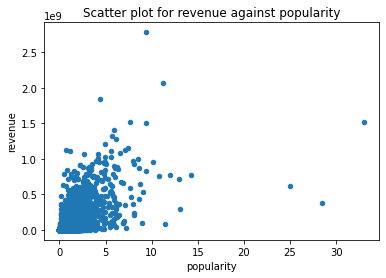

In [63]:
# Scatterplot to determine the relation between revenue and popularity
my_func('popularity','revenue')

From observation of the above visualization where most points are concentrated at 0 to 5 for popularity and 0 to 1 for revenue I conclude that a high popularity does not translate to a high revenue from the movie hence producers cannot rely on popularity to predict their revenues.

### Research Question 4  (What's the trend of movie production over the years?)

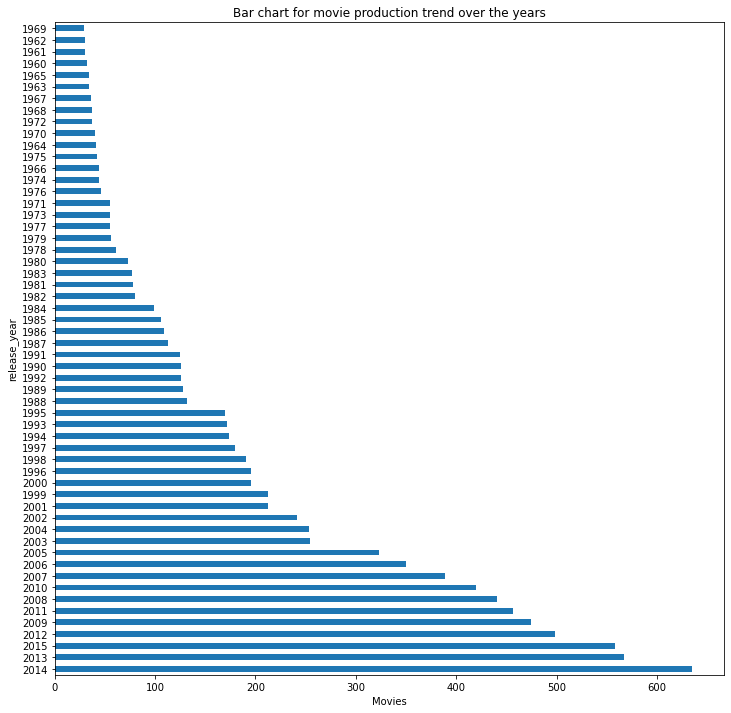

In [28]:
# Horizontal Bar chart to determine the trend of movie production over the years
df['release_year'].value_counts().plot(kind='barh', figsize= (12,12));
plt.title('Bar chart for movie production trend over the years')
plt.xlabel('Movies')
plt.ylabel('release_year');

The above bar chart shows the distribution of movies by their release years, I observed that there was an increase in the number of movies produced in the years 2012,2013, 2014 and 2015. This can be seen from the long bars for the years 2012,2013, 2014 and 2015 on the above chart and can be attributed to improved technology which has made it possible to produce more movies with ease.

<a id='conclusions'></a>
## Conclusions

In conclusion movie producers should not overspend on movie production as it does not directly translate to popularity, Movies with a moderate runtime of about 100-150 had the highest popularity hence producers should focus on delivering movies that are not too long or too shot  so as to achieve a high popularity of their movies and finally producers should not measure their movie revenues in consideration of popularity as we have observed that popularity of movies does not directly translate to revenue.<br>

<a id='Limitations'></a>
## Limitations

Our data was sufficient to answer our analysis questions however there are more intriguing questions that can be answered with a more enriched data like the addition of age rating for movies.<br>
The data had many missing values which in turn affected the quality of the data.<br>
The genre column had most movies classified in multiple genres hence hard to use for analysis.